![](s1.jpg)

<b>Linear Regression :</b>
    <br>
         &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Linear regression is a model that establishes a linear relationship between input variables and output variables. It can be used in prediction, forecasting, error reduction and also in quantifing the relationship between two or more variables.
            </font>

## Importing required libraries and datasets

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

## Analysis of Data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.shape

(25, 2)

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

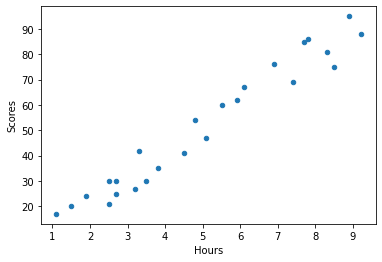

In [12]:
data.plot.scatter(x="Hours",y="Scores")

## Splitting train and test sets 

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
float64 int64


In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

## Regression model

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [16]:
line = regressor.coef_*X+regressor.intercept_

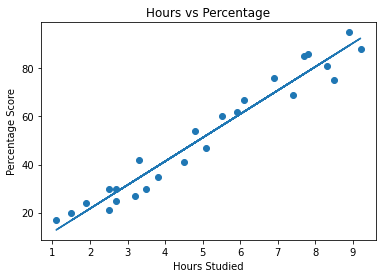

In [17]:
plt.scatter(X, y)
plt.plot(X, line)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

## Prediction and evaluation

In [18]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]]


In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.140342096254413


In [23]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.96728365185982


Thus our model has predicted that a student who has studied for 9.25hrs/day will score a percentage of 92.96.